In [69]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
import joblib
import pickle


In [70]:
# Load training data from Google Sheets
train_sheet_url = 'https://docs.google.com/spreadsheets/d/1C5K210JMYklz-_naYRaoxXPF6nZIGbXYrn0o0rBeY9I/export?format=csv&gid=1607079722'
train_data = pd.read_csv(train_sheet_url)

# Load test data from Google Sheets
test_sheet_url = 'https://docs.google.com/spreadsheets/d/1ChyuXQFc7ivtDxdEnbII2lRT3xc6OaMSZp_ud7arf9U/export?format=csv&gid=2082460844'
test_data = pd.read_csv(test_sheet_url)

print(train_data.head())
print(test_data.head())

   battery_power  blue  clock_speed  dual_sim    fc  four_g  int_memory  \
0            842     0          2.2         0   1.0     0.0         7.0   
1           1021     1          0.5         1   0.0     1.0        53.0   
2            563     1          0.5         1   2.0     1.0        41.0   
3            615     1          2.5         0   0.0     0.0        10.0   
4           1821     1          1.2         0  13.0     1.0        44.0   

   m_dep  mobile_wt  n_cores  ...  px_height  px_width     ram  sc_h  sc_w  \
0    0.6      188.0      2.0  ...       20.0     756.0  2549.0   9.0   7.0   
1    0.7      136.0      3.0  ...      905.0    1988.0  2631.0  17.0   3.0   
2    0.9      145.0      5.0  ...     1263.0    1716.0  2603.0  11.0   2.0   
3    0.8      131.0      6.0  ...     1216.0    1786.0  2769.0  16.0   8.0   
4    0.6      141.0      2.0  ...     1208.0    1212.0  1411.0   8.0   2.0   

   talk_time  three_g  touch_screen  wifi  price_range  
0         19        0  

In [71]:
train_data = pd.read_csv(train_sheet_url)
test_data = pd.read_csv(test_sheet_url)

In [72]:
# Check for missing values
print("\nMissing values in training data:")
print(train_data.isna().sum())
print("\nMissing values in test data:")
print(test_data.isna().sum())


Missing values in training data:
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               5
four_g           5
int_memory       5
m_dep            5
mobile_wt        4
n_cores          4
pc               5
px_height        4
px_width         2
ram              2
sc_h             1
sc_w             1
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Missing values in test data:
id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64


In [73]:
# Check for infinite values
print("\nInfinite values in training data:")
print(np.isinf(train_data).sum())
print("\nInfinite values in test data:")
print(np.isinf(test_data).sum())


Infinite values in training data:
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Infinite values in test data:
id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64


In [74]:
# Handle missing values (for simplicity, fill with median or mean, or drop rows/columns if needed)
train_data.fillna(train_data.median(), inplace=True)
test_data.fillna(test_data.median(), inplace=True)

In [75]:
# Handle infinite values (replace with large finite number or drop rows/columns)
train_data.replace([np.inf, -np.inf], np.nan, inplace=True)
test_data.replace([np.inf, -np.inf], np.nan, inplace=True)
train_data.fillna(train_data.median(), inplace=True)
test_data.fillna(test_data.median(), inplace=True)

In [76]:
# Feature and target separation
X = train_data.drop('price_range', axis=1)
y = train_data['price_range']

In [77]:
# Define categorical and numerical features
categorical_features = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
numerical_features = X.columns.difference(categorical_features)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Preprocess training data
X_preprocessed = preprocessor.fit_transform(X)

with open('preprocessor.pkl', 'wb') as s:
    pickle.dump(preprocessor, s)
    s.close()

In [78]:
X_preprocessed

array([[-0.90259726,  0.83077942, -0.76378511, ...,  0.        ,
         0.        ,  1.        ],
       [-0.49513857, -1.2530642 , -0.99474523, ...,  1.        ,
         1.        ,  0.        ],
       [-1.5376865 , -1.2530642 , -0.53282499, ...,  1.        ,
         1.        ,  0.        ],
       ...,
       [ 1.53077336, -0.76274805, -0.76378511, ...,  1.        ,
         1.        ,  0.        ],
       [ 0.62252745, -0.76274805, -0.07090476, ...,  1.        ,
         0.        ,  1.        ],
       [-1.65833069,  0.58562134,  0.16005536, ...,  1.        ,
         0.        ,  1.        ]])

In [79]:
numerical_features

Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time'],
      dtype='object')

In [80]:
categorical_features

['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']


Validation Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       105
           1       0.82      0.82      0.82        91
           2       0.79      0.80      0.80        92
           3       0.94      0.91      0.92       112

    accuracy                           0.88       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.88      0.88      0.88       400

Confusion Matrix:
[[100   5   0   0]
 [  6  75  10   0]
 [  0  11  74   7]
 [  0   0  10 102]]


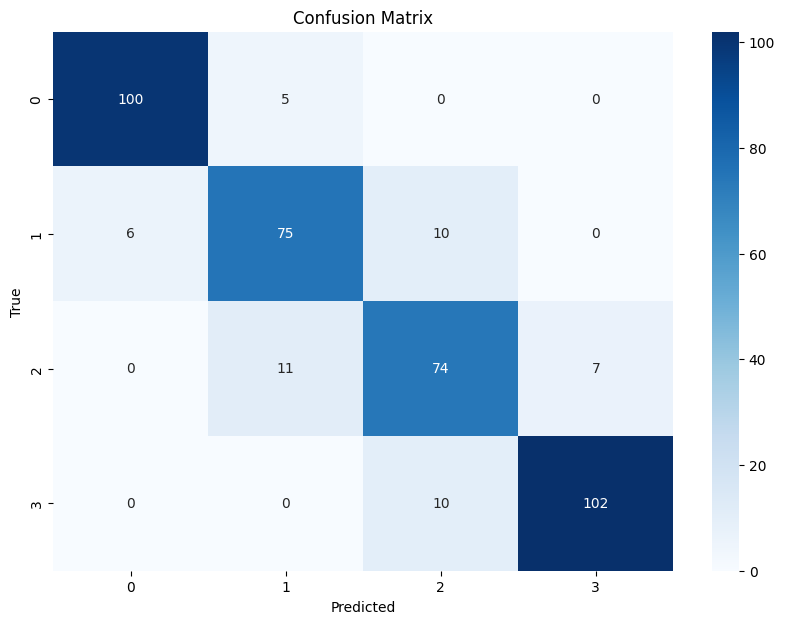


Test Data Predictions for the first 10 samples:
   id  predicted_price_range
0   1                      3
1   2                      3
2   3                      2
3   4                      3
4   5                      1
5   6                      3
6   7                      3
7   8                      1
8   9                      3
9  10                      0


In [81]:
# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Model Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Model Evaluation
y_val_pred = model.predict(X_val)
print("\nValidation Classification Report:")
print(classification_report(y_val, y_val_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))

# Visualization of Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_val, y_val_pred), annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Preprocess test data

X_test = test_data.drop('price_range', axis=1, errors='ignore')  # Ignore error if 'price_range' is not present in test data
X_test_preprocessed = preprocessor.transform(X_test)

# Select the first 10 samples for prediction
X_test_10 = X_test_preprocessed[:10]

# Make Predictions on Test Data
test_predictions_10 = model.predict(X_test_10)

# Add predictions to the test data
test_data_10 = test_data.iloc[:10].copy()
test_data_10['predicted_price_range'] = test_predictions_10

# Display Predictions
print("\nTest Data Predictions for the first 10 samples:")
print(test_data_10[['id', 'predicted_price_range']])


In [82]:
X_test

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


In [83]:
X_test_preprocessed

array([[-0.44505984,  0.34046327,  2.23869643, ...,  1.        ,
         1.        ,  0.        ],
       [-0.90487356, -1.2530642 , -0.07090476, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.29403758,  1.56625363, -0.76378511, ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [-0.12182446, -0.14985287, -0.76378511, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.67032987, -1.2530642 , -0.99474523, ...,  1.        ,
         1.        ,  0.        ],
       [ 0.07166151, -1.2530642 , -0.07090476, ...,  0.        ,
         0.        ,  1.        ]])

In [84]:
test_predictions_10

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0], dtype=int64)

In [85]:
from sklearn.metrics import accuracy_score
# Calculate accuracy
# Make predictions on the validation set
y_val_pred = model.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_val_pred)
accuracy_percentage = accuracy * 100

# Print accuracy percentage
print(f"Validation Accuracy: {accuracy_percentage:.2f}%")

#joblib.dump(model, 'model.pkl')

with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)
    f.close()

Validation Accuracy: 87.75%


## Manual Prediction

In [86]:
preddata={
    "battery_power": 842,
    "blue": 0,
    "clock_speed": 2.2,
    "dual_sim": 1,
    "fc": 1,
    "four_g": 1,
    "int_memory": 7,
    "m_dep": 0.6,
    "mobile_wt": 188,
    "n_cores": 2,
    "pc": 2,
    "px_height": 20,
    "px_width": 756,
    "ram": 2549,
    "sc_h": 9,
    "sc_w": 7,
    "talk_time": 18,
    "three_g": 0,
    "touch_screen": 0,
    "wifi": 1
}
df_1 = pd.DataFrame([preddata])
preddata_preprocessed = preprocessor.transform(df_1)
# Make Predictions on Test Data
prediction = model.predict(preddata_preprocessed)

In [87]:
prediction

array([1], dtype=int64)